In [ ]:
#Below model is build for predicting if an individual is intrested in taking Insurance policy or not
#Built with RandomForestClassifier

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import metrics as mt
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import os

In [ ]:
train_data=pd.read_csv("train_data_path")
test_data=pd.read_csv("test_data_path")

In [ ]:
np.where(test_data.isnull().astype('object')=='True')

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
print(train_data.shape, test_data.shape)

(5822, 86) (4000, 85)


In [ ]:
#Finding target variable
set(train_data.columns) - set(test_data.columns)

{'V86'}

In [ ]:
test_data["V86"] = 'NA'

In [ ]:
test_data=test_data[train_data.columns]
print(print(train_data.shape, test_data.shape))

train_data['data'] ='train'
test_data['data']  ='test'

all_data=pd.concat([train_data,test_data],axis=0)

(5822, 86) (4000, 86)
None


In [ ]:
for i in range(0,86):
    if all_data.dtypes[i] != "int64":
        print(all_data.columns[i])


V86


### Finding outliers with Z-Score

In [ ]:
for col in all_data.columns:
    if col in ["V86","data"]:
        pass
    else:
        z_score=np.abs(stats.zscore(all_data[col]))
        lent=len(np.where(z_score>3))
        if lent>1:
            print("Outlier detected in {0}".format(col))
        
        #print("Outler Detected " if lent>1 else "No outliers "+"in {0}".format(col))

#### Making Categories for Number of houses

In [ ]:
all_data["V2"].value_counts(normalize=True)*100

1     90.765628
2      8.358786
3      0.651598
7      0.081450
4      0.040725
6      0.030544
5      0.030544
10     0.020362
8      0.020362
Name: V2, dtype: float64

In [ ]:
for val in all_data["V2"].unique():
    if val > 3:
        name="V2_MT3"
        all_data[name]=np.where(all_data["V2"] > 3, 1, 0)
        break
    else:
        name="V2_"+str(val)
        all_data[name]=np.where(all_data["V2"] == val, 1, 0).astype('object')

del all_data["V2"]        

In [ ]:
all_data["V3"].value_counts() 

3    4513
2    3616
4    1132
1     452
5     106
6       3
Name: V3, dtype: int64

In [ ]:
all_data["V3"].value_counts(normalize= True)*100

3    45.947872
2    36.815313
4    11.525148
1     4.601914
5     1.079210
6     0.030544
Name: V3, dtype: float64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


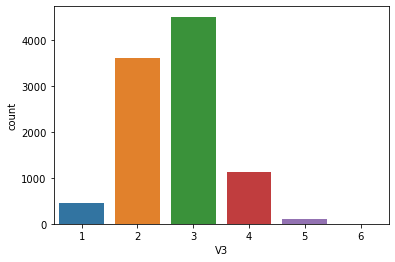

In [ ]:
sns.countplot("V3",data=all_data)

In [ ]:
all_data["V3_2A3"]=np.where(np.logical_or(all_data["V3"]==2, all_data["V3"]==3), 1,0)
del all_data["V3"]

In [ ]:
corr_values = all_data.corr().copy()

In [ ]:
corr_thres=0.85
col_to_del=[]
for col in corr_values.columns:
    if ((np.abs(corr_values[col]) > corr_thres).any() and corr_values[(np.abs(corr_values[col]) > corr_thres)].index[0] != col):
        print(col)
        print(list(corr_values[np.abs(corr_values[col]) > corr_thres].index))
        col_to_del.append(list(corr_values[np.abs(corr_values[col]) > corr_thres].index)[1])

In [ ]:
#col_to_del

['V5',
 'V12',
 'V31',
 'V36',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85']

In [ ]:
all_data.drop(col_to_del, axis=1, inplace=True)

In [ ]:
all_data

,V1,V4,V6,V7,V8,V9,V10,V11,V13,V14,...,V62,V63,V64,V86,data,V2_1,V2_2,V2_3,V2_MT3,V3_2A3
0,33,2,0,5,1,3,7,0,1,2,...,0,0,0,0,train,1,0,0,0,1
1,37,2,1,4,1,4,6,2,0,4,...,0,0,0,0,train,1,0,0,0,1
2,37,2,0,4,2,4,3,2,4,4,...,0,0,0,0,train,1,0,0,0,1
3,9,3,2,3,2,4,5,2,2,3,...,0,0,0,0,train,1,0,0,0,1
4,40,2,1,4,1,4,7,1,2,4,...,0,0,0,0,train,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,4,0,7,2,0,5,2,2,6,...,0,0,0,NA,test,1,0,0,0,1
3996,24,3,1,5,1,3,4,2,4,4,...,0,0,0,NA,test,1,0,0,0,1
3997,36,3,1,5,1,3,7,0,2,5,...,0,1,0,NA,test,1,0,0,0,1
3998,33,3,1,4,2,3,7,1,2,3,...,0,0,0,NA,test,1,0,0,0,1


In [ ]:
#pd.crosstab(train_data["V5"], train_data["V86"], margins=True, normalize=True)*100
#normalize row wise with normalize="index"
#pd.crosstab(train_data["V5"], train_data["V86"], margins=False, normalize=True)*100
pd.crosstab(train_data["V5"], train_data["V86"], margins=False, normalize='index')*100

V86,0,1
V5,,
1,91.304348,8.695652
2,86.852590,13.147410
3,93.340858,6.659142
4,100.000000,0.000000
5,97.363796,2.636204
6,98.048780,1.951220
7,96.363636,3.636364
8,94.305822,5.694178
9,93.703148,6.296852


In [ ]:
pd.crosstab(train_data["V6"], train_data["V86"], margins=False, normalize='index')*100

V86,0,1
V6,,
0,94.516729,5.483271
1,93.308318,6.691682
2,92.633015,7.366985
3,95.394737,4.605263
4,98.484848,1.515152
5,94.444444,5.555556
6,92.307692,7.692308
7,100.000000,0.000000
8,100.000000,0.000000


In [ ]:
# [7,8,9] [0,5] [1,2] [6]
# all_data["V6_6"]=np.where(all_data["V6"] == 6,1,0)
# all_data["V6_12"]=np.where(np.logical_or(all_data["V6"] == 1, all_data["V6"]==2),1,0)
# all_data["V6_05"]=np.where(np.logical_or(all_data["V6"] == 0, all_data["V6"]==5),1,0)
# all_data["V6_789"]=np.where(np.logical_or(all_data["V6"] == 7, all_data["V6"]==8),1,0)
# all_data["V6_789"]=np.where(all_data["V6"] == 9,1,0)

# del all_data["V6"]

# all_data["V44"].value_counts(normalize=True)*100

# all_data["V44_0"] = np.where(all_data["V44"] == 0, 1,0)
# all_data["V44_2"] = np.where(all_data["V44"] == 2, 1,0)

# del all_data["V44"]

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data_p = all_data[all_data['data']=='train']
test_data_p  = all_data[all_data['data']=='test']

x_test=test_data_p.drop(['data','V86'], axis=1)
x_train=train_data_p.drop(['V86','data'], axis=1)

y_train=train_data_p["V86"]

In [ ]:
#As we have been provided with seperate test data, we wont split it rather use whole training data
#train_data_px, train_data_py = train_test_split(train_data_p, test_size=0.3, random_state=2)

In [ ]:
y_train = y_train.astype(int)

In [ ]:
y_train.value_counts(normalize=True)

0    0.940227
1    0.059773
Name: V86, dtype: float64

### Using RFC to fit data

In [ ]:
#help(RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(verbose=0)

In [ ]:
param_dict = {'n_estimators' : [300,100,200],
             'max_features' :[5,10,20,40,50],
             'bootstrap': [True,False],
             'class_weight': [None, 'balanced'],
             'criterion' : ['entropy','gini'],
             'max_depth' : [None,3,5,8],
              'min_samples_split' : [4,6,20,30],
              'min_samples_leaf' : [2,5,8,10,15]
             }

In [ ]:
%%time
2*5*2*2*2*4*4*4

Wall time: 0 ns


5120

In [ ]:
#help(RandomizedSearchCV)

In [ ]:
n_iter_srch=10

random_search = RandomizedSearchCV(clf, param_distributions=param_dict, n_iter=n_iter_srch,n_jobs=-1,
                                   scoring='roc_auc' , cv=10)

In [ ]:
# fbeta_scorer=mt.make_scorer(mt.fbeta_score, beta=2)
# n_iter_srch=50

# random_search = RandomizedSearchCV(clf, param_distributions=param_dict, n_iter=n_iter_srch,n_jobs=-1,
#                                   scoring=fbeta_scorer , cv=10)

In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 3, 5, 8],
                                        'max_features': [5, 10, 20, 40, 50],
                                        'min_samples_leaf': [2, 5, 8, 10, 15],
                                        'min_samples_split': [4, 6, 20, 30],
                                        'n_estimators': [300, 100, 200]},
                   scoring='roc_auc')

In [ ]:
def overview(result, n_top = 3):
    for val in range (1, n_top+1):
        val_index = np.flatnonzero(result['rank_test_score'] == val)
        for i in val_index:
            print('Model with Rank {0}'.format(val))
            print('\tStandard Deviation : {0}'.format(result['std_test_score'][i]))
            print('\tMean Test Score : {0}'.format(result['mean_test_score'][i]))
            print('\tParameters :{0}'.format(result['params'][i]))


In [ ]:
def report(random_search, n_top=3):
    for rank, i in enumerate(np.argsort(random_search.cv_results_['rank_test_score'])[:n_top]):
        print("Model with rank {0}".format(rank+1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              random_search.cv_results_['mean_test_score'][i],
              random_search.cv_results_['std_test_score'][i]))
        print('\tMean Test Score : {0}'.format(random_search.cv_results_['mean_test_score'][i]))
        print("Parameters: {0}".format(random_search.cv_results_['params'][i]))
        print("="*40)


In [ ]:
random_search

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 3, 5, 8],
                                        'max_features': [5, 10, 20, 40, 50],
                                        'min_samples_leaf': [2, 5, 8, 10, 15],
                                        'min_samples_split': [4, 6, 20, 30],
                                        'n_estimators': [300, 100, 200]},
                   scoring='roc_auc')

In [ ]:
report(random_search,5)

Model with rank 1
Mean validation score: 0.773 (std: 0.032)
	Mean Test Score : 0.7732487716059482
Parameters: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 8, 'max_features': 10, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Model with rank 2
Mean validation score: 0.768 (std: 0.035)
	Mean Test Score : 0.7677349988354674
Parameters: {'n_estimators': 300, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Model with rank 3
Mean validation score: 0.766 (std: 0.037)
	Mean Test Score : 0.7660331587898773
Parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Model with rank 4
Mean validation score: 0.765 (std: 0.032)
	Mean Test Score : 0.7646862792942742
Parameters: {'n_estimators': 300, 'min_

In [ ]:
overview(random_search.cv_results_,5)

Model with Rank 1
	Standard Deviation : 0.03200030778527202
	Mean Test Score : 0.7732487716059482
	Parameters :{'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 8, 'max_features': 10, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Model with Rank 2
	Standard Deviation : 0.034689852197404676
	Mean Test Score : 0.7677349988354674
	Parameters :{'n_estimators': 300, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Model with Rank 3
	Standard Deviation : 0.0368115758056616
	Mean Test Score : 0.7660331587898773
	Parameters :{'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Model with Rank 4
	Standard Deviation : 0.032353325102869944
	Mean Test Score : 0.7646862792942742
	Parameters :{'n_estimators': 300, 

In [ ]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=8, min_samples_split=30,
                       n_estimators=200)

In [ ]:
rf=random_search.best_estimator_

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=8, min_samples_split=30,
                       n_estimators=200)

In [ ]:
x_pred = rf.predict(x_train)
x_pred_prob = rf.predict_proba(x_train)
x_accur = mt.accuracy_score(y_train, x_pred)
x_fbeta = mt.fbeta_score(y_train, x_pred, beta=2)

auc_sc  = mt.roc_auc_score(y_train, x_pred_prob[:,1])

In [ ]:
print("Accuracy : {0:.2f}\nF-Beta Score {1:.2f}\nAUC Score {2:.2f}".format(x_accur, x_fbeta, auc_sc))

Accuracy : 0.77
F-Beta Score 0.46
AUC Score 0.86


In [ ]:
mt.precision_recall_fscore_support(y_train, x_pred, beta=2)

(array([0.98188574, 0.17810026]),
 array([0.77237852, 0.77586207]),
 array([0.80680864, 0.46423659]),
 array([5474,  348], dtype=int64))

In [ ]:
mt.recall_score(y_train, x_pred), mt.precision_score(y_train, x_pred)

(0.7758620689655172, 0.17810026385224276)

In [ ]:
prec, recal, _ = mt.precision_recall_curve(y_train, x_pred_prob[:,1])

In [ ]:
fpr, tpr, thres = mt.roc_curve(y_train, x_pred_prob[:,1])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Precission'), Text(0.5, 0, 'Recall')]

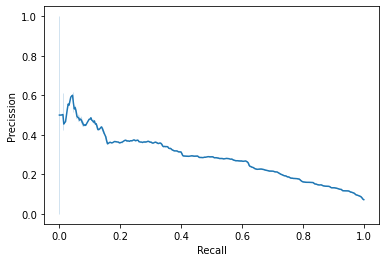

In [ ]:
sns.lineplot(recal, prec).set(xlabel='Recall', ylabel='Precission')

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


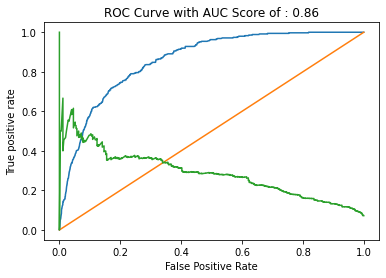

In [ ]:
sns.lineplot(fpr, tpr).set(xlabel='False Positive Rate', ylabel='True positive rate')
plt.plot([0,1])
plt.plot(recal, prec)
plt.title("ROC Curve with AUC Score of : {:.2f}".format(auc_sc))
plt.show()

In [ ]:
pd.crosstab(y_train, x_pred)

col_0,0,1
V86,,
0,4228,1246
1,78,270


In [ ]:
mt.confusion_matrix(y_train, x_pred)

array([[4228, 1246],
       [  78,  270]], dtype=int64)

### Feature Importance

In [ ]:
x_train.columns

Index(['V1', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'V29', 'V30', 'V32', 'V33', 'V34', 'V35', 'V37',
       'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57',
       'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V2_1', 'V2_2', 'V2_3',
       'V2_MT3', 'V3_2A3'],
      dtype='object')

In [ ]:
feat_imp_df=pd.DataFrame({'Features':x_train.columns, 'importance':rf.feature_importances_})

In [ ]:
# rf1=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
#                        max_features=40, min_samples_leaf=2, min_samples_split=4,
#                        verbose=1)

In [ ]:
#rf.fit(x_train, y_train) or rf=RandomClassifier(put parameters which we get from best estimator)

In [ ]:
feat_imp_df.sort_values('importance', ascending=False)

,Features,importance
40,V47,0.254753
52,V59,0.117223
37,V44,0.053830
35,V42,0.053584
0,V1,0.042767
...,...,...
50,V57,0.000000
43,V50,0.000000
53,V60,0.000000
56,V63,0.000000


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


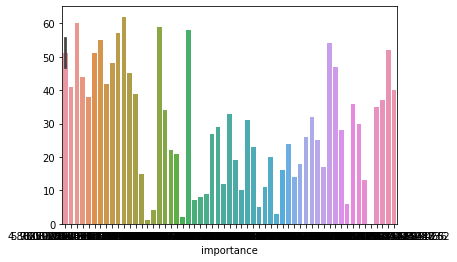

In [ ]:
#plotting feature importance of varaibles in Data
sns.barplot(feat_imp_df["importance"], feat_imp_df.index)

In [ ]:
#feat_imp_df.loc[feat_imp_df["importance"] ==0, "Features"]

In [ ]:
feat_imp_df.loc[feat_imp_df["importance"] ==0, "Features"].values

array(['V50', 'V53', 'V56', 'V57', 'V60', 'V63', 'V2_MT3'], dtype=object)

## Permutation inspection

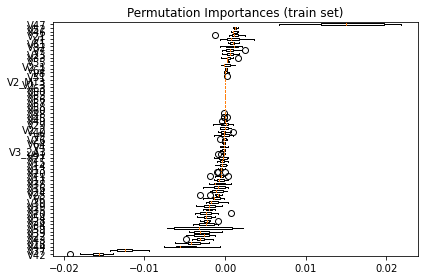

Index(['V42', 'V37', 'V44', 'V18', 'V43', 'V22', 'V39', 'V59', 'V34', 'V28',
       'V54', 'V10', 'V35', 'V19', 'V30', 'V6', 'V25', 'V24', 'V16', 'V38',
       'V17', 'V11', 'V20', 'V13', 'V14', 'V15', 'V27', 'V41', 'V3_2A3', 'V4',
       'V64', 'V26', 'V9', 'V40', 'V2_2', 'V29', 'V49', 'V45', 'V48', 'V60',
       'V58', 'V57', 'V56', 'V53', 'V50', 'V63', 'V2_3', 'V2_MT3', 'V51', 'V8',
       'V62', 'V2_1', 'V55', 'V33', 'V23', 'V7', 'V32', 'V61', 'V1', 'V21',
       'V46', 'V52', 'V47'],
      dtype='object')

In [ ]:
#help(permutation_importance)

permt_imp_fit = permutation_importance(rf,x_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sort_idx = permt_imp_fit.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(permt_imp_fit.importances[sort_idx].T,
           vert=False, labels=x_train.columns[sort_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

x_train.columns[sort_idx]

In [ ]:
x_train_f=x_train.drop(feat_imp_df.loc[feat_imp_df["importance"] ==0, "Features"].values, axis=1)
y_train_f=y_train.copy()

In [ ]:
x_train_f.shape, y_train_f.shape ,x_train.shape

((5822, 56), (5822,), (5822, 63))

In [ ]:
rf.fit(x_train_f, y_train_f)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=8, min_samples_split=30,
                       n_estimators=200)

In [ ]:
x_pred_f = rf.predict(x_train_f)
mt.fbeta_score(y_train, x_pred_f, beta=2)

0.4565739787161002

In [ ]:
mt.recall_score(y_train, x_pred_f), mt.precision_score(y_train, x_pred_f)

(0.764367816091954, 0.17488494411571334)

In [ ]:
mt.accuracy_score(y_train, x_pred_f)

0.7703538302988664

### Submission

In [ ]:
test_predict = rf.predict(x_test)
pd.DataFrame(test_predict).to_csv(r"writing_predicted_class",index=False)